# Experiment 4: Testing perturbations

In [1]:
import os
import sys
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
device = torch.device(
    'cuda') if torch.cuda.is_available() else torch.device("cpu")
img = "./experiments/samples/sample.jpg"

In [3]:
os.chdir("../")

In [4]:
from evaluation.robustness import gaussian_noise_transform, gaussian_blur_transform, contrast_modify_transform, brightness_adjust_transform, apply_occlusion, s_and_p_noise_transform

In [5]:
im = Image.open(img).convert("RGB")
t = transforms.Compose([
    transforms.ToTensor()
])
im = t(im)

In [6]:
def apply_trans_and_show(im, trs, strn, is_oc=False):
    if not is_oc:
        tr = trs(strn)
        im1 = tr(im)
    else:
        im1, im2 = trs(im, im, strn)
        im1 = im1.squeeze(0)
    plt.imshow(im1.permute(1, 2, 0))
    plt.axis('off')
    plt.show()

Adding gaussian noise of: 0.18


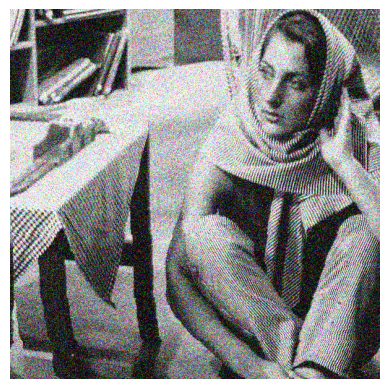

In [7]:
apply_trans_and_show(im, gaussian_noise_transform, 0.18)

Adding salt and pepper noise with ratio: 0.18


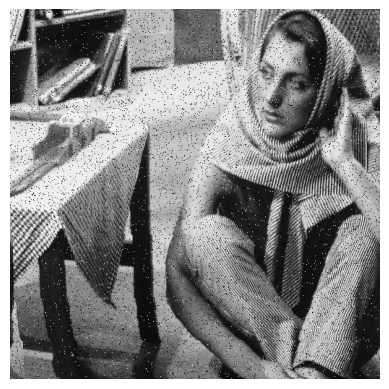

In [8]:
apply_trans_and_show(im, s_and_p_noise_transform, 0.18)

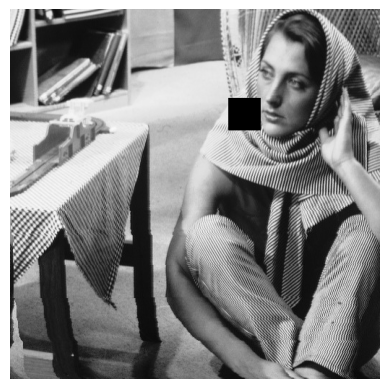

In [ ]:
im_b = im.unsqueeze(0)
apply_trans_and_show(im_b, apply_occlusion, 45, True)

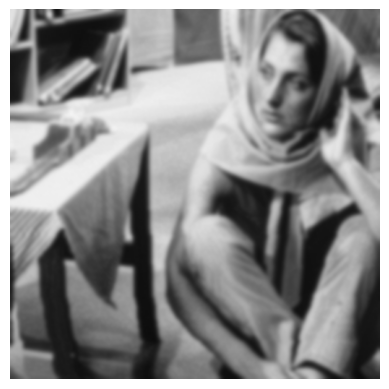

In [11]:
apply_trans_and_show(im, gaussian_blur_transform, 15)